<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

**Student: Emily Nilson**

---

For project two, you will complete a serious of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [2]:
movies = pd.read_csv('./data/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [3]:
movies.shape

(979, 6)

#### Check the data type of each column.

In [4]:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

#### Calculate the average movie duration.

In [5]:
movies.loc[:, 'duration'].mean()

120.97957099080695

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [6]:
# call .head() and .tail() to avoid scrolling through large list

movies.sort_values('duration').head()

,star_rating,title,content_rating,genre,duration,actors_list
389,8.0,Freaks,UNRATED,Drama,64,"[u'Wallace Ford', u'Leila Hyams', u'Olga Bacla..."
338,8.0,Battleship Potemkin,UNRATED,History,66,"[u'Aleksandr Antonov', u'Vladimir Barsky', u'G..."
258,8.1,The Cabinet of Dr. Caligari,UNRATED,Crime,67,"[u'Werner Krauss', u'Conrad Veidt', u'Friedric..."
293,8.1,Duck Soup,PASSED,Comedy,68,"[u'Groucho Marx', u'Harpo Marx', u'Chico Marx']"
88,8.4,The Kid,NOT RATED,Comedy,68,"[u'Charles Chaplin', u'Edna Purviance', u'Jack..."


In [7]:
movies.sort_values('duration').tail()

,star_rating,title,content_rating,genre,duration,actors_list
445,7.9,The Ten Commandments,APPROVED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


#### Create a histogram of duration, choosing an "appropriate" number of bins.

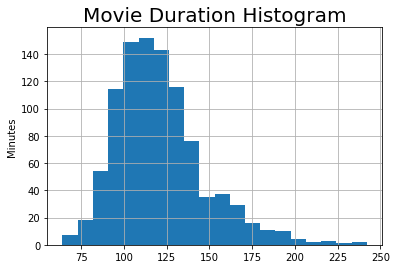

In [8]:
ax = movies.loc[:, 'duration'].hist(bins=20)
ax.set_title('Movie Duration Histogram', fontsize=20)
ax.set_ylabel('Minutes');

#### Use a box plot to display that same data.

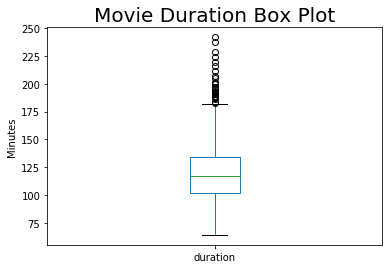

In [9]:
ax = movies.loc[:, 'duration'].plot.box()
ax.set_title('Movie Duration Box Plot', fontsize=20)
ax.set_ylabel('Minutes');

## Intermediate level

#### Count how many movies have each of the content ratings.

In [10]:
movies.loc[:, 'content_rating'].value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
NC-17          7
PASSED         7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

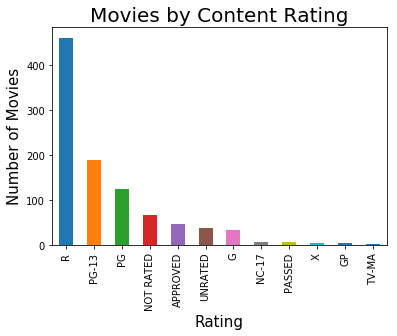

In [11]:
ax = movies.loc[:, 'content_rating'].value_counts().plot(kind = 'bar')
ax.set_title('Movies by Content Rating', fontsize=20)
ax.set_ylabel('Number of Movies', fontsize=15)
ax.set_xlabel('Rating', fontsize=15);

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [12]:
movies.loc[:, 'content_rating'].replace(['NOT RATED','APPROVED','PASSED','GP'], 'UNRATED', inplace=True)

movies.loc[:, 'content_rating'].value_counts()

# manual math to validate recategorization:
# value counts before conversion: unrated: 38, not rated: 65, approved: 47, passed: 7, gp: 3 (sum = 160)
# new value counts: unrated new total = 160

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17        7
X            4
TV-MA        1
Name: content_rating, dtype: int64

#### Convert the following content ratings to "NC-17": X, TV-MA.

In [13]:
movies.loc[:, 'content_rating'].replace(['X', 'TV-MA'], 'NC-17', inplace=True)

movies.loc[:, 'content_rating'].value_counts()

# manual math to validate recategorization
# value counts before conversion: nc-17: 7, x: 4, tv-ma: 1 (sum = 12)
# new value counts: nc-17 total = 12

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17       12
Name: content_rating, dtype: int64

*Not part of the exercise, but would be nice to see the updated bar chart of content ratings for comparison*

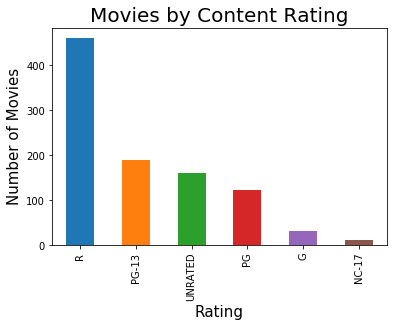

In [15]:
ax = movies.loc[:, 'content_rating'].value_counts().plot(kind = 'bar')
ax.set_title('Movies by Content Rating', fontsize=20)
ax.set_ylabel('Number of Movies', fontsize=15)
ax.set_xlabel('Rating', fontsize=15);

#### Count the number of missing values in each column.

In [16]:
movies.isnull().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [17]:
# there are 3 null values in the 'content rating' column

content_rating_null_mask = movies['content_rating'].isnull()
movies[content_rating_null_mask]

# convert nulls to "UNRATED" (seems to be catch-all category)

,star_rating,title,content_rating,genre,duration,actors_list
187,8.2,Butch Cassidy and the Sundance Kid,NaN,Biography,110,"[u'Paul Newman', u'Robert Redford', u'Katharin..."
649,7.7,Where Eagles Dare,NaN,Action,158,"[u'Richard Burton', u'Clint Eastwood', u'Mary ..."
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


In [19]:
movies.loc[content_rating_null_mask, 'content_rating'] = "UNRATED"

# confirm null values were handled
movies.isnull().sum()

star_rating       0
title             0
content_rating    0
genre             0
duration          0
actors_list       0
dtype: int64

#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [20]:
# 2 hours = 120 minutes

two_hrs_or_more = movies.loc[:, 'duration'] >= 120
less_than_two_hrs = movies.loc[:, 'duration'] < 120

print('Average star rating for movies 2 hours or longer', 
      movies.loc[two_hrs_or_more, 'star_rating'].mean())

print('Average star rating for movies less than 2 hours', 
      movies.loc[less_than_two_hrs, 'star_rating'].mean())

Average star rating for movies 2 hours or longer 7.948898678414082
Average star rating for movies less than 2 hours 7.838666666666657


#### Use a visualization to detect whether there is a relationship between duration and star rating.

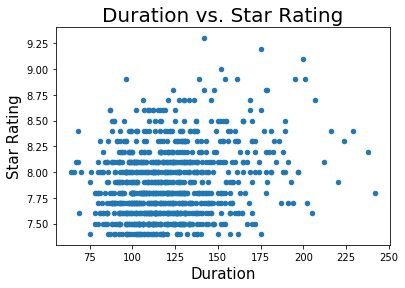

In [21]:
ax = movies.plot(kind='scatter', x = 'duration', y = 'star_rating')
ax.set_title('Duration vs. Star Rating', fontsize=20)
ax.set_xlabel('Duration', fontsize=15)
ax.set_ylabel('Star Rating', fontsize=15);

# no discernable relationship

#### Calculate the average duration for each genre.

In [22]:
movies.groupby('genre')['duration'].mean()

genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

## Advanced level

#### Visualize the relationship between content rating and duration.

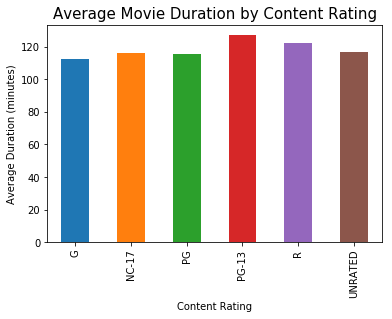

In [23]:
# first as a bar chart showing average movie duration by content rating
ax = movies.groupby('content_rating')['duration'].mean().plot(kind='bar')
ax.set_title('Average Movie Duration by Content Rating', fontsize=15)
ax.set_xlabel('Content Rating')
ax.set_ylabel('Average Duration (minutes)');

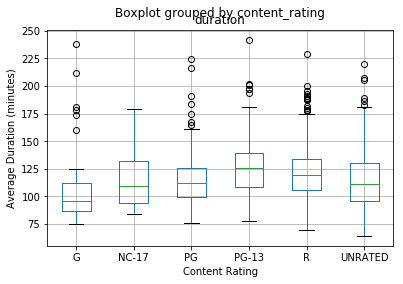

In [24]:
# next as a set of box plots showing duration by content rating
ax = movies.boxplot(by='content_rating', column='duration')
ax.set_xlabel('Content Rating')
ax.set_ylabel('Average Duration (minutes)');

# how to remove automatically generated title? can't get suptitle("") to work

#### Determine the top rated movie (by star rating) for each genre.

In [25]:
# sort movies in order of star rating
# use groupby.first to call the first occurrence of each genre
movies.sort_values(by='star_rating', ascending=False).groupby('genre').first()

,star_rating,title,content_rating,duration,actors_list
genre,,,,,
Action,9.0,The Dark Knight,PG-13,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
Adventure,8.9,The Lord of the Rings: The Return of the King,PG-13,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
Animation,8.6,Spirited Away,PG,125,"[u'Daveigh Chase', u'Suzanne Pleshette', u'Miy..."
Biography,8.9,Schindler's List,R,195,"[u'Liam Neeson', u'Ralph Fiennes', u'Ben Kings..."
Comedy,8.6,Modern Times,G,87,"[u'Charles Chaplin', u'Paulette Goddard', u'He..."
Crime,9.3,The Shawshank Redemption,R,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
Drama,8.9,12 Angry Men,UNRATED,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
Family,7.9,E.T. the Extra-Terrestrial,PG,115,"[u'Henry Thomas', u'Drew Barrymore', u'Peter C..."
Fantasy,7.7,The City of Lost Children,R,112,"[u'Ron Perlman', u'Daniel Emilfork', u'Judith ..."


#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [26]:
# check IF there are duplicates
print(movies.title.duplicated().sum())

# check WHICH movies are duplicates
movies[movies.title.duplicated()]

4


,star_rating,title,content_rating,genre,duration,actors_list
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
936,7.4,True Grit,UNRATED,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


In [27]:
# use the identified duplicate titles from above to inspect the rows
# can see that the films with the same title have different actors, ratings, and duration
# therefore, they are not actual duplicates

movies.loc[movies.loc[:, 'title'].isin(['Dracula','The Girl with the Dragon Tattoo', 
                                             'Les Miserables', 'True Grit']), :]

,star_rating,title,content_rating,genre,duration,actors_list
466,7.9,The Girl with the Dragon Tattoo,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe..."
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
662,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei..."
678,7.7,Les Miserables,PG-13,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hat..."
703,7.6,Dracula,UNRATED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
936,7.4,True Grit,UNRATED,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


#### Option 1: manually create a list of relevant genres, then filter using that list

In [106]:
# selected option 4         
            

#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [67]:
# selected option 4

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [ ]:
# selected option 4

#### Option 4: aggregate by count and mean, then filter using the count

In [96]:
count_by_genre = movies.groupby('genre')['star_rating'].agg(['count','mean'])
count_by_genre.loc[(count_by_genre['count'] >= 10), :]

,count,mean
genre,,
Action,136,7.884559
Adventure,75,7.933333
Animation,62,7.914516
Biography,77,7.862338
Comedy,156,7.822436
Crime,124,7.916935
Drama,278,7.902518
Horror,29,7.806897
Mystery,16,7.975000


## Bonus

#### Figure out something "interesting" using the actors data!

**Question to answer:** Which actor appears most frequently as the lead actor in this set of movies?

*Assumption*: lead actor is the *first* actor listed for each film

In [31]:
# clean up the actors data by removing extraneous symbols
movies.loc[:, 'actors_list'] = movies.loc[:, 'actors_list'].str.replace('u','')
movies.loc[:, 'actors_list'] = movies.loc[:, 'actors_list'].str.replace('[','')
movies.loc[:, 'actors_list'] = movies.loc[:, 'actors_list'].str.replace(']','')
actors = movies.loc[:, 'actors_list'].str.split(',', expand=True)

actors.head()

,0,1,2
0,'Tim Robbins','Morgan Freeman','Bob Gnton'
1,'Marlon Brando','Al Pacino','James Caan'
2,'Al Pacino','Robert De Niro','Robert Dvall'
3,'Christian Bale','Heath Ledger','Aaron Eckhart'
4,'John Travolta','Uma Thrman','Samel L. Jackson'


In [32]:
actors.loc[:, 0].describe()

# Robert De Niro appears most frequently (13 times) as the lead actor in this set of movies

count                  979
unique                 581
top       'Robert De Niro'
freq                    13
Name: 0, dtype: object